In [1]:

# import the necessary packages
import imutils
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("/home/pruthvirg/Downloads/image(4).png")
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
 
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=4)
thresh = cv2.dilate(thresh, None, iterations=4)
 
# find contours in thresholded image, then grab the largest
# one
im2, contours, hierarchy= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(225, 225, 3)


In [2]:
print(contours[0])

[[[ 70   9]]

 [[ 69  10]]

 [[ 67  10]]

 [[ 66  11]]

 [[ 65  11]]

 [[ 64  12]]

 [[ 63  12]]

 [[ 63  13]]

 [[ 61  15]]

 [[ 61  16]]

 [[ 60  17]]

 [[ 60  18]]

 [[ 59  19]]

 [[ 59  30]]

 [[ 60  31]]

 [[ 60  32]]

 [[ 62  34]]

 [[ 62  35]]

 [[ 64  37]]

 [[ 64  38]]

 [[ 65  39]]

 [[ 65  40]]

 [[ 61  44]]

 [[ 61  48]]

 [[ 57  52]]

 [[ 56  52]]

 [[ 52  56]]

 [[ 52  57]]

 [[ 50  59]]

 [[ 50  60]]

 [[ 49  61]]

 [[ 49  62]]

 [[ 48  63]]

 [[ 48  64]]

 [[ 47  65]]

 [[ 47  67]]

 [[ 46  68]]

 [[ 46  70]]

 [[ 45  71]]

 [[ 45  95]]

 [[ 46  96]]

 [[ 46 100]]

 [[ 47 101]]

 [[ 47 104]]

 [[ 48 105]]

 [[ 48 107]]

 [[ 49 108]]

 [[ 49 111]]

 [[ 50 112]]

 [[ 50 115]]

 [[ 51 116]]

 [[ 51 118]]

 [[ 52 119]]

 [[ 52 128]]

 [[ 51 129]]

 [[ 51 131]]

 [[ 50 132]]

 [[ 50 133]]

 [[ 49 134]]

 [[ 49 135]]

 [[ 48 136]]

 [[ 48 138]]

 [[ 47 139]]

 [[ 47 147]]

 [[ 63 147]]

 [[ 64 148]]

 [[ 67 148]]

 [[ 68 149]]

 [[ 72 149]]

 [[ 73 150]]

 [[ 79 150]]

 [[ 80

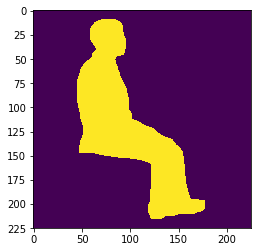

In [3]:
imgplot = plt.imshow(im2)

In [4]:
contours_list = list(contours)

In [5]:
contours_list[0][1][0]

array([69, 10], dtype=int32)

In [6]:
c = max(contours, key=cv2.contourArea)

In [7]:

# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [8]:
extTop

(70, 9)

In [9]:
extRight

(177, 204)

In [10]:

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
 
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
blank = int(extTop[1])

In [12]:
body = image[blank:-100]
neck = body[0:int(0.35*len(body))]
back = body[int(0.35*len(body)):]
full_cut = blank+int(0.35*len(body))

In [13]:
print(full_cut)

49


In [14]:
cv2.imshow("Neck",neck)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imshow("back",back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cont_list = np.ndarray.tolist(contours[0])

In [16]:
type(cont_list[0][0])

list

In [17]:
back_point_list = []

In [18]:
len(image)

225

In [19]:
for i in cont_list:
    if i[0][1] > len(image)-100:
        break
        print("broke")
    if i[0][1] > 36:
        back_point_list.append(i[0][0])

In [20]:
back_point_list

[64,
 64,
 65,
 65,
 61,
 61,
 57,
 56,
 52,
 52,
 50,
 50,
 49,
 49,
 48,
 48,
 47,
 47,
 46,
 46,
 45,
 45,
 46,
 46,
 47,
 47,
 48,
 48,
 49,
 49,
 50,
 50,
 51,
 51,
 52]

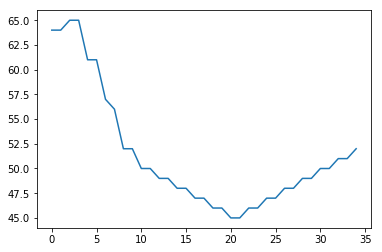

In [21]:
plt.plot(back_point_list)
    

In [22]:
statistics.stdev(back_point_list)

6.132569066985266

In [23]:
cv2.line(im2,(45,0),(45,225),(255,0,0),1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

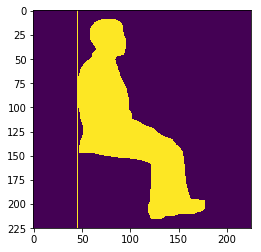

In [24]:
plt.imshow(im2)

In [25]:
square_sum = 0
for i in back_point_list:
    square_sum = square_sum + (i-45)*(i-45)

In [26]:
back_lenght = len(back_point_list)

In [27]:
print(square_sum/(back_lenght))

78.22857142857143
